In [1]:
#import dependecies
import pandas as pd
import numpy as np
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, SVG
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#importing csv
Image_Paths_df = pd.read_csv('Transformed_Valid_Data/Image_paths.csv')
Image_Paths_df.head()

,Image_Path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


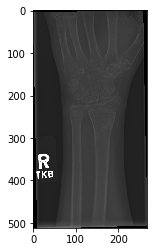

In [3]:
path = Image_Paths_df['Image_Path'][0]
img_array = cv2.imread(path)
plt.imshow(img_array, cmap="gray")
plt.show()

In [ ]:
# Plot the first image from the dataset
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

In [35]:
Valid_Seperated_Results_df = pd.read_csv('Transformed_Valid_Data/valid_images_seperated.csv')
Valid_Seperated_Results_df.head()

,Folder,Data_Type,Xray_Type,Patient,Study_Outcome,Image
0,MURA-v1.1,valid,XR_WRIST,patient11185,study1_positive,image1.png
1,MURA-v1.1,valid,XR_WRIST,patient11185,study1_positive,image2.png
2,MURA-v1.1,valid,XR_WRIST,patient11185,study1_positive,image3.png
3,MURA-v1.1,valid,XR_WRIST,patient11185,study1_positive,image4.png
4,MURA-v1.1,valid,XR_WRIST,patient11186,study1_positive,image1.png


In [36]:
Valid_Seperated_Results_df = Valid_Seperated_Results_df.drop(
    Valid_Seperated_Results_df.columns[[0,1,3,5]], axis=1)

In [37]:
Valid_Seperated_Results_df.head()

,Xray_Type,Study_Outcome
0,XR_WRIST,study1_positive
1,XR_WRIST,study1_positive
2,XR_WRIST,study1_positive
3,XR_WRIST,study1_positive
4,XR_WRIST,study1_positive


In [40]:
XRay_Study_df = Valid_Seperated_Results_df.join(Image_Paths_df)
XRay_Study_df.head()

,Xray_Type,Study_Outcome,Image_Path
0,XR_WRIST,study1_positive,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,XR_WRIST,study1_positive,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,XR_WRIST,study1_positive,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,XR_WRIST,study1_positive,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,XR_WRIST,study1_positive,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [42]:
# Keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

Using TensorFlow backend.


In [44]:
(X_train, y_train), X_test, y_test) = XRay_Study_df
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

ValueError: too many values to unpack (expected 2)